<a href="https://colab.research.google.com/github/mrFahrenhiet/Covid19_Detection/blob/master/COVID_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://cb.lk/covid_19

--2020-05-08 12:13:49--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-05-08 12:13:49--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-05-08 12:13:49--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-05-08 12:13:50--  https://www.dropbox.com/s/raw/7r

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *
import os

Using TensorFlow backend.


In [0]:
from keras.losses import binary_crossentropy

In [5]:
len(os.listdir('./CovidDataset/Val/Covid'))

30

In [0]:
TrainPath = './CovidDataset/Train'
ValPath = './CovidDataset/Val'

In [0]:
model = Sequential()

In [27]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss=binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(TrainPath,target_size=(224,224),batch_size=32,class_mode='binary')

Found 224 images belonging to 2 classes.


In [30]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [31]:
validation_gen = test_datagen.flow_from_directory(ValPath,target_size=(224,224),batch_size=32,class_mode='binary')

Found 60 images belonging to 2 classes.


In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
mc = ModelCheckpoint('./best.h5',monitor='val_accuracy',save_best_only=True,save_weights_only=False)

In [34]:
hist = model.fit_generator(train_generator,steps_per_epoch=8,epochs=10,validation_data=validation_gen,validation_steps=2,callbacks=[mc])

Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 1.6046 - accuracy: 0.5156 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.6904 - accuracy: 0.5625 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.6331 - accuracy: 0.6680 - val_loss: 0.5503 - val_accuracy: 0.9167
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.4505 - accuracy: 0.7734 - val_loss: 0.2468 - val_accuracy: 0.9167
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.3128 - accuracy: 0.9023 - val_loss: 0.1199 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.2392 - accuracy: 0.9062 - val_loss: 0.1154 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.2446 - accuracy: 0.9102 - val_loss: 0.0691 - val_accuracy: 0.9667
Epoch 8/10
8/8 [=======================

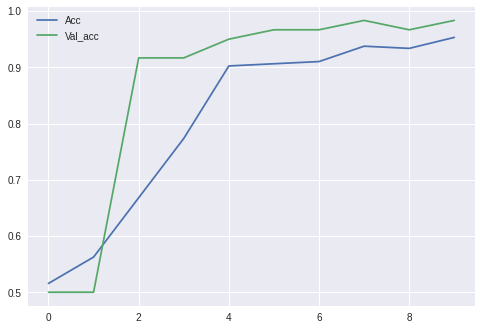

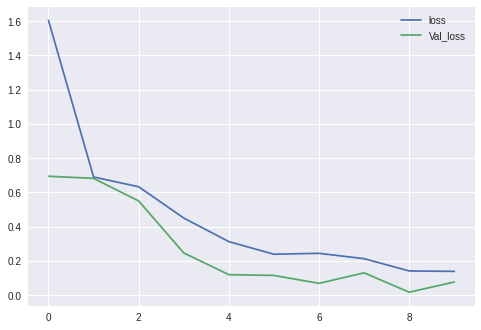

In [42]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],label = "Acc")
plt.plot(hist.history['val_accuracy'],label="Val_acc")
plt.legend()
plt.show()
plt.plot(hist.history['loss'],label = "loss")
plt.plot(hist.history['val_loss'],label="Val_loss")
plt.legend()
plt.show()


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
covid = os.listdir(ValPath+'/Covid')[1:11]

In [0]:
imgs_data = []
for i in range(10):
  img = image.load_img(ValPath + '/Covid/' + covid[i],target_size=(224,224))
  img = image.img_to_array(img)
  imgs_data.append(img)

In [71]:
len(imgs_data)

10

In [0]:
imgs_data = np.array(imgs_data)/255.0

In [73]:
imgs_data.shape

(10, 224, 224, 3)

In [0]:
y_p = model.predict(imgs_data)

In [0]:
y_pred = []
for i in y_p:
  if i >0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [76]:
y_pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
normal = os.listdir(ValPath+'/Normal')[1:11]

In [0]:
imgs_data2 = []
for i in range(10):
  img = image.load_img(ValPath + '/Normal/' + normal[i],target_size=(224,224))
  img = image.img_to_array(img)
  imgs_data2.append(img)

In [79]:
imgs_data2 = np.array(imgs_data2)/255.0
imgs_data2.shape

(10, 224, 224, 3)

In [0]:
y_p = model.predict(imgs_data2)

In [0]:
for i in y_p:
  if i >0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [0]:
y_pred = np.array(y_pred)

In [92]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
y_true = np.zeros((10,),dtype=int)

In [88]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
yt = np.ones((10,),dtype=int)
yt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [91]:
y_true = np.hstack((y_true,yt))
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
cfm = confusion_matrix(y_true,y_pred)

In [0]:
import seaborn as sns

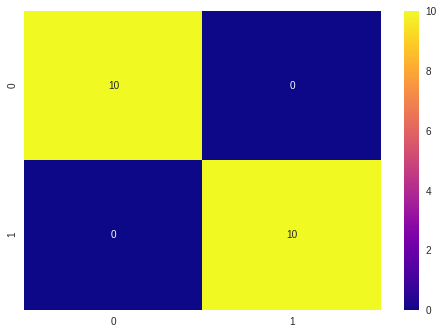

In [102]:
sns.heatmap(cfm,cmap=plt.cm.plasma,annot=True)

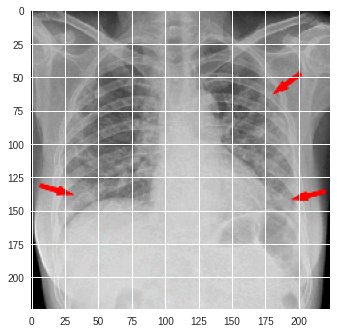

(1, 224, 224, 3)

In [116]:
img = image.load_img('./ss.png',target_size=(224,224))
img = image.img_to_array(img)/255.0
plt.imshow(img)
plt.show()
img = img.reshape((1,224,224,3))
img.shape

In [117]:
prediction = model.predict(img)
if prediction>0.5:
  print("Normal")
else:
  print("Infected")

Infected


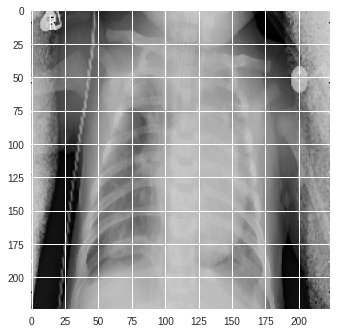

(1, 224, 224, 3)

In [124]:
img2 = image.load_img('./p.jpeg',target_size=(224,224))
img2 = image.img_to_array(img2)/255.0
plt.imshow(img2)
plt.show()
img2 = img2.reshape((1,224,224,3))
img2.shape

In [126]:
prediction = model.predict(img2)
if prediction>0.5:
  print("Normal")
else:
  print("Infected")

Normal


In [0]:
model.save('./model_best.h5')